In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Store')]

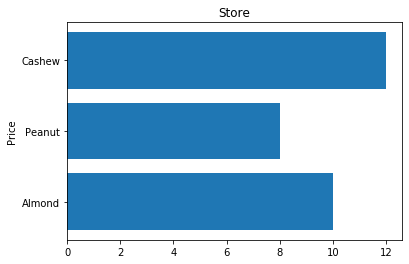

In [7]:
# make plot from dictionay:
nut_butter_prices = {
    'Almond' : 10,
    'Peanut' : 8,
    'Cashew' : 12
}
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
ax.set(title='Store',
      ylabel='Price')

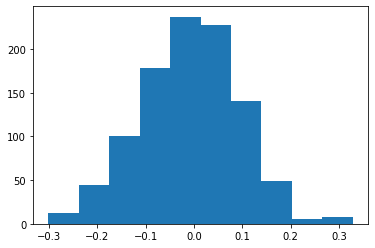

In [8]:
# make some data for hist and plot
import numpy as np
# draws from normal distribution 
mu, sigma = 0, .1
x = np.random.normal(mu, sigma, 1000)
fig, ax = plt.subplots()
ax.hist(x);

## two options for subplots

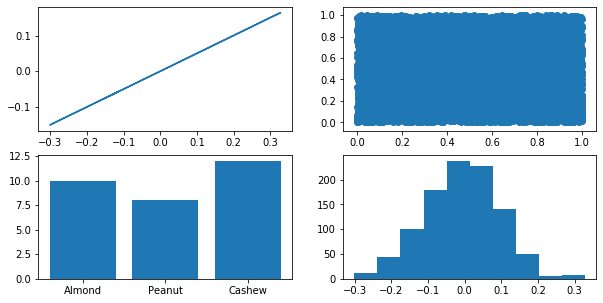

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10, 5))

ax1.plot(x, x/2)
ax2.scatter(np.random.random(10000), np.random.random(10000))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(x);

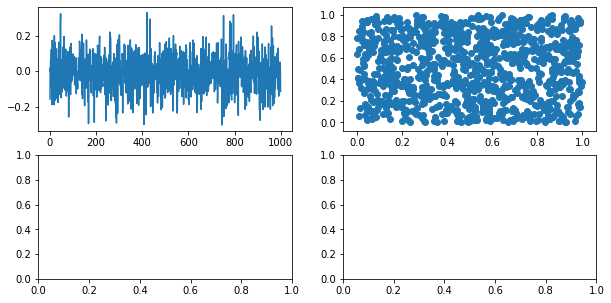

In [10]:
# subplot option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10, 5))
ax[0, 0].plot(x)
ax[0, 1].scatter(np.random.random(1000), np.random.random(1000))

## Plotting from pd dfs

In [11]:
import pandas as pd
import os
os.getcwd()

'/Users/jschmidt345/udemy/zero-to-mastery-ml/sample_project'

In [12]:
# make df
car = pd.read_csv('/Users/jschmidt345/udemy/zero-to-mastery-ml/data/car-sales.csv')

In [13]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))

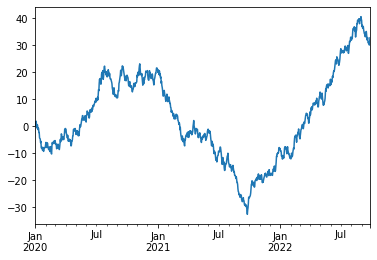

In [14]:
ts = ts.cumsum()
ts.plot();

In [15]:
car['Price'] = car['Price'].str.replace('[\$\, \.]', "")
car['Price'] = car['Price'].str[:-2]

In [16]:
car['Sale Date'] = pd.date_range('1/1/2020', periods=len(car))

In [17]:
car['Total'] = car['Price'].astype(int).cumsum()

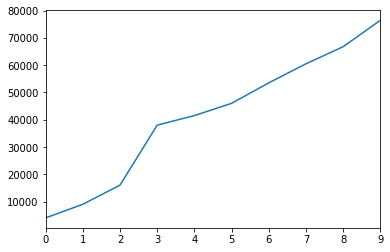

In [18]:
# plot total sales
car['Total'].plot(x='Sale Date', y='Total')
car['Price'] = car['Price'].astype(int)

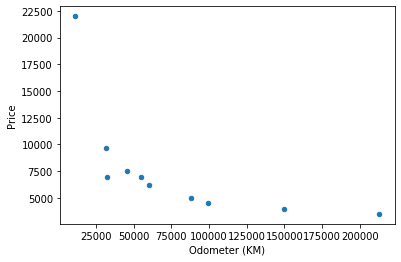

In [19]:
car.plot(x='Odometer (KM)', y='Price', kind='scatter')

In [25]:
# bar
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

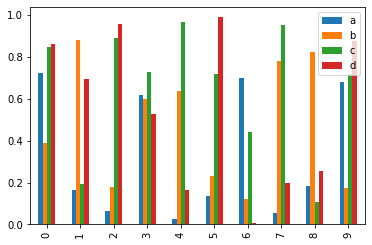

In [29]:
df.plot.bar();

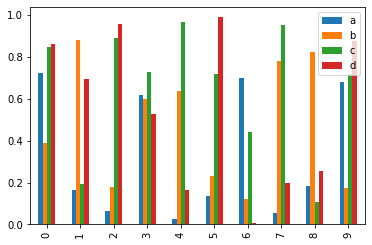

In [31]:
df.plot(kind='bar');

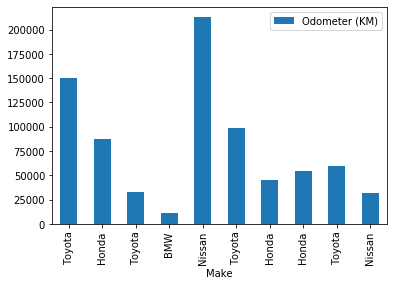

In [34]:
car.plot.bar(y='Odometer (KM)', x='Make')

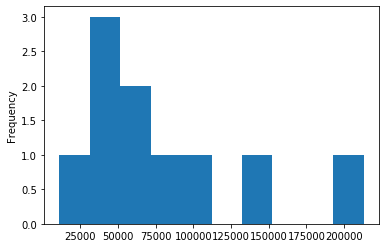

In [46]:
# histograms
car['Odometer (KM)'].plot.hist()

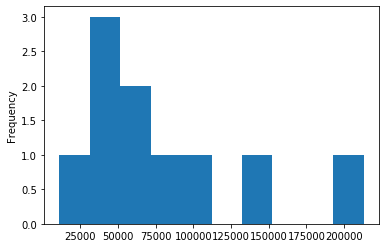

In [42]:
car['Odometer (KM)'].plot(kind='hist')

In [47]:
heart_disease = pd.read_csv('/Users/jschmidt345/udemy/zero-to-mastery-ml/data/heart-disease.csv')

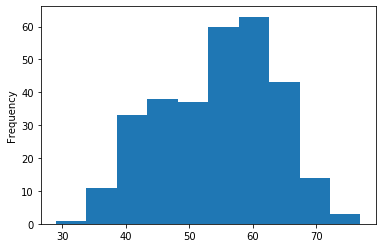

In [51]:
# create histogram
heart_disease['age'].plot.hist()

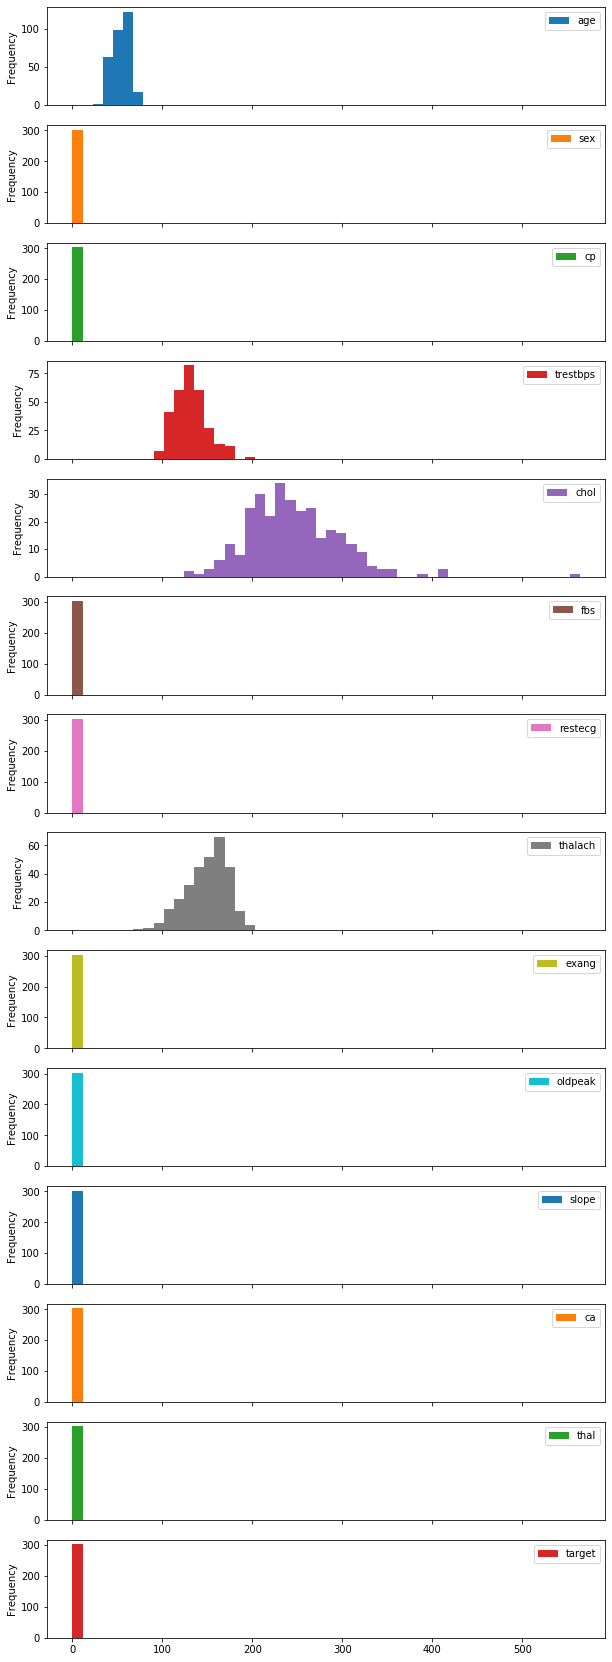

In [55]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True, bins=50);

### Which one should I use? (pyplot vs oo method)

* When plotting something quickly, ok to use pyplot
* Aim to use OO method for large scale


In [57]:
pat_over_50 = heart_disease[heart_disease['age'] > 50]

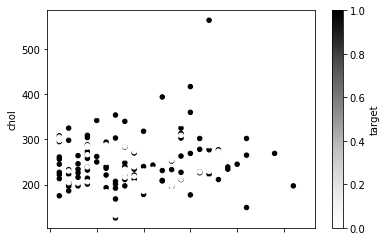

In [62]:
# pyplot method
pat_over_50.plot(kind='scatter',
                x='age',
                y='chol',
                c='target');

(45, 100)

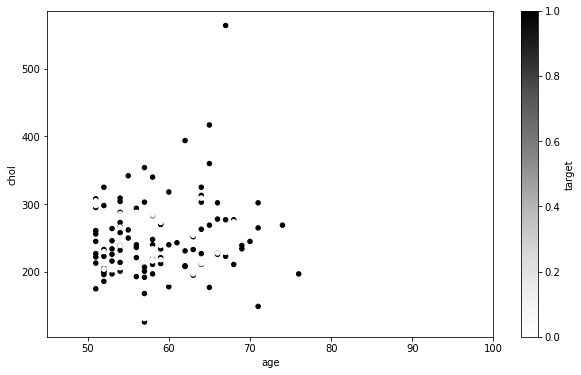

In [69]:
# oo method mixed w pyplot
fig, ax = plt.subplots(figsize=(10, 6))
pat_over_50.plot(kind='scatter',
                x='age',
                y='chol',
                c='target',
                ax=ax);
ax.set_xlim([45, 100])


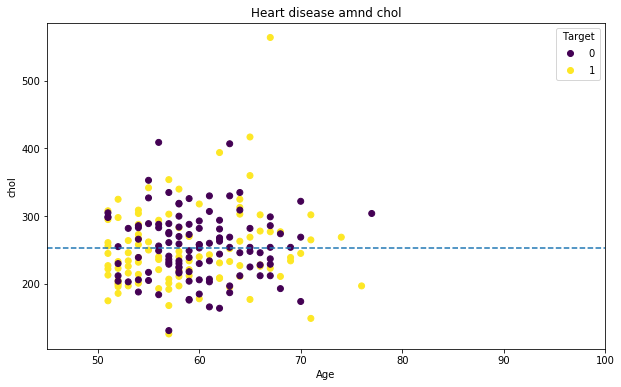

In [89]:
## full oo
fig, ax = plt.subplots(figsize=(10, 6))

# plot 
scatter = ax.scatter(x=pat_over_50['age'], 
                     y=pat_over_50['chol'],
                     c=pat_over_50['target'])

# customize
ax.set(title='Heart disease amnd chol', 
       xlabel='Age',
       ylabel='chol',
       xlim=(45, 100),
      )

# add legend
ax.legend(*scatter.legend_elements(), title='Target')

# add horizontal line to represent avg
ax.axhline(np.mean(pat_over_50['chol']),
          linestyle='--');

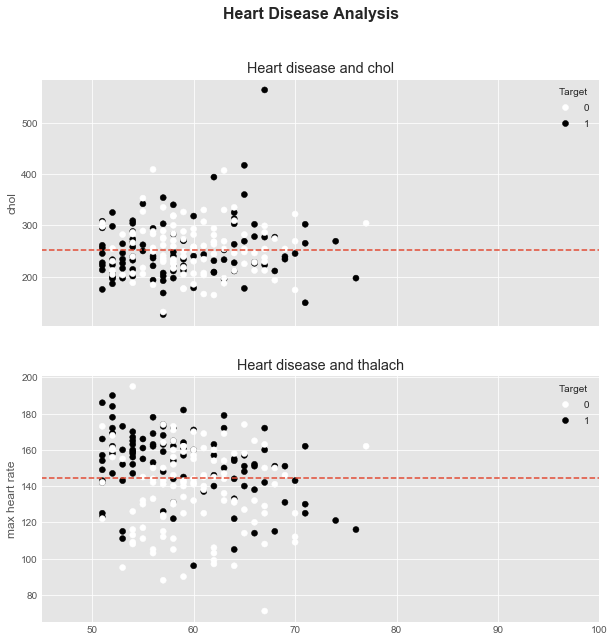

In [141]:
## Mega OOP 
# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)

# add data to axis 0
scatter = ax0.scatter(x=pat_over_50['age'], y=pat_over_50['chol'],
                     c=pat_over_50['target'])

# customize ax0
ax0.set(title='Heart disease and chol',
#        xlabel='age',
       ylabel='chol',
       xlim=(45, 100))

# add legend
ax0.legend(*scatter.legend_elements(), title='Target')
# add meanline
ax0.axhline(y=np.mean(pat_over_50['chol']),
           linestyle='--')

scatter1 = ax1.scatter(x=pat_over_50['age'], 
                       y=pat_over_50['thalach'],
                      c=pat_over_50['target'])
# customize ax1
ax1.set(title='Heart disease and thalach',
#         xlabel='age', 
        ylabel='max heart rate',
        xlim=(45, 100))
# add legend
ax1.legend(*scatter.legend_elements(), title='Target')
# add meanline
ax1.axhline(y=np.mean(pat_over_50['thalach']),
           linestyle='--')

# add a title to figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

fig.savefig('trash.png')

## customizing matplotlib plots

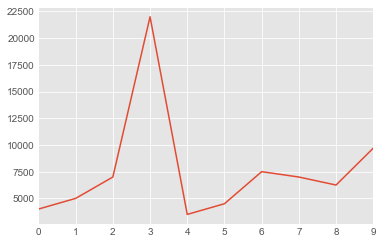

In [121]:
car['Price'].plot();

In [123]:
plt.style.use('ggplot')

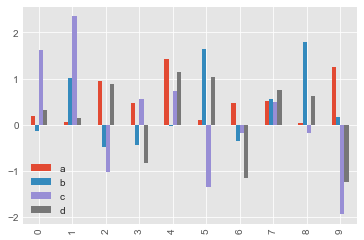

In [138]:
x = np.random.randn(10, 4)
df = pd.DataFrame(x, 
                  columns = ['a', 'b', 'c' ,'d'])
ax = df.plot(kind='bar')

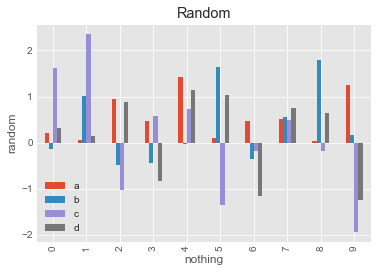

In [140]:
# customize our plot
ax = df.plot(kind='bar')
# add labels and title
ax.set(title='Random', 
       xlabel='nothing',
      ylabel='random');
